In [1]:
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = pathlib.Path("../../Data/clean/Plate2/nELISA_plate_430420_SH_SY5Y.csv")
manual_cluster_1_path = pathlib.Path(
    "../../Data/clean/Plate2/Manual_Treatment_Clusters_1.csv"
)

manual_cluster_2_path = pathlib.Path(
    "../../Data/clean/Plate2/Manual_Treatment_Clusters_2.csv"
)

df = pd.read_csv(path)
manual_clusters_1 = pd.read_csv(manual_cluster_1_path)
manual_clusters_2 = pd.read_csv(manual_cluster_2_path)

In [3]:
# select data only columns and make floats
nELISA_data_values = df.filter(like="NSU", axis=1)
nELISA_data_values = nELISA_data_values.astype("float")
nELISA_data_values.head()

,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],...,TWEAK [NSU],uPA [NSU],VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU]
0,0.050305,-0.046947,1.361487,0.553065,3.161210,0.323546,0.200321,-4.628914,-1.455375,1.411887,...,-1.053944,1.931219,0.439120,-1.538831,30.157265,-0.733615,0.413442,-0.897618,-1.841281,0.048389
1,-0.136531,1.014299,-1.829310,-2.860160,3.326872,-0.293770,0.520861,1.004449,-0.906373,2.202077,...,-0.871663,3.274879,-0.738697,0.816301,29.581649,-0.939235,-0.385612,-1.410167,-1.406394,-0.863555
2,1.240569,0.229261,1.995245,-2.499106,-4.232099,-1.807823,-0.656196,0.746356,-0.001466,-3.299824,...,-0.251360,1.923855,-0.523146,0.204165,31.313849,-2.824671,1.220794,-1.488981,1.496881,-0.107094
3,0.629592,1.492948,-1.857380,-0.308989,-0.640024,0.713347,-0.554004,-1.260493,0.067077,1.431232,...,-1.318833,2.165008,-0.282784,-0.779901,28.934441,-0.304395,0.177668,-0.300231,0.083451,-1.798261
4,-0.375887,0.390727,-0.026048,-0.563376,1.802794,0.231624,1.355083,-0.230052,-0.209977,0.476215,...,-1.003948,1.439554,0.407104,-0.753367,32.680499,-1.739692,-1.222531,0.841332,-0.464893,0.077351


In [4]:
# normalize data via max value in each column
max_values = nELISA_data_values.max()  # find max value in each column
nELISA_data_values_sensor_max_norm = nELISA_data_values.div(
    max_values
)  # divide each value in each column by max value in that column
nELISA_data_values_sensor_max_norm.head()
# min max normalization via sklearn
from sklearn import preprocessing

# normalize data via min max normalization
min_max_scaler = preprocessing.MinMaxScaler()
nELISA_data_values_min_max_norm = min_max_scaler.fit_transform(nELISA_data_values)
nELISA_data_values_min_max_norm = pd.DataFrame(
    nELISA_data_values_min_max_norm, columns=nELISA_data_values.columns
)
nELISA_data_values_min_max_norm.head()

,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],...,TWEAK [NSU],uPA [NSU],VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU]
0,0.595518,0.564662,0.538727,0.751911,0.796710,0.506570,0.557007,0.000000,0.130110,0.585972,...,0.318056,0.180171,0.524795,0.299154,0.296559,0.278150,0.570920,0.344809,0.232809,0.725177
1,0.549004,0.856272,0.127459,0.070602,0.810357,0.359850,0.600601,0.682277,0.288149,0.681883,...,0.356741,0.305277,0.271509,0.767602,0.260110,0.250799,0.457524,0.225962,0.300728,0.459638
2,0.891845,0.640559,0.620414,0.142671,0.187645,0.000000,0.440517,0.651019,0.548641,0.014080,...,0.488387,0.179485,0.317863,0.645845,0.369798,0.000000,0.685494,0.207687,0.754146,0.679904
3,0.739737,0.987796,0.123841,0.579838,0.483562,0.599216,0.454416,0.407962,0.568372,0.588320,...,0.261839,0.201939,0.369552,0.450109,0.219126,0.335244,0.537461,0.483328,0.533404,0.187470
4,0.489414,0.684927,0.359885,0.529060,0.684803,0.484723,0.714058,0.532762,0.488618,0.472403,...,0.328667,0.134393,0.517910,0.455387,0.456338,0.144323,0.338754,0.748028,0.447766,0.733610


In [5]:
# show max columns pandas
pd.set_option("display.max_columns", None)
df.head()

,plate_name,plate_barcode,position_x,cell_type,incubation inducer,inhibitor,inhibitor_concentration_value,inhibitor_concentration_unit,inhibitor_concentration,inducer1,inducer1_concentration_value,inducer1_concentration_unit,inducer1_concentration,inducer2,inducer2_concentration_value,inducer2_concentration_unit,inducer2_concentration,plate_position,user_plate_id,user_sample_id,position_y,nelisa_sample_dilution_fold,nelisa_sample_comments,nelisa_sample_pass_qc,nelisa_sample_id,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],BMP4 [NSU],BMP6 [NSU],BMP7 [NSU],BMP9 [NSU],C5/C5a [NSU],Calbindin [NSU],CCL1 [NSU],CCL11 [NSU],CCL13 [NSU],CCL15 [NSU],CCL16 [NSU],CCL17 [NSU],CCL18 [NSU],CCL19 [NSU],CCL2 [NSU],CCL20 [NSU],CCL21 [NSU],CCL22 [NSU],CCL23 [NSU],CCL24 [NSU],CCL25 [NSU],CCL27 [NSU],CCL28 [NSU],CCL3 [NSU],CCL4 [NSU],CCL5 [NSU],CCL7 [NSU],CCL8 [NSU],CD14 [NSU],CD163 [NSU],CD276 (B7-H3) [NSU],CD27L [NSU],CD30 [NSU],CD40L [NSU],CNTF [NSU],CRP [NSU],CX3CL1 [NSU],CXCL1 [NSU],CXCL10 [NSU],CXCL11 [NSU],CXCL12 (alpha) [NSU],CXCL12 (beta) [NSU],CXCL13 [NSU],CXCL14 [NSU],CXCL16 [NSU],CXCL17 [NSU],CXCL3 [NSU],CXCL4 [NSU],CXCL5 [NSU],CXCL6 [NSU],CXCL7 [NSU],CXCL9 [NSU],Cytochrome C [NSU],EGF [NSU],EGFR [NSU],EMMPRIN [NSU],FAS-L [NSU],FGF-1 [NSU],FGF-19 [NSU],FGF-2 [NSU],FGF-21 [NSU],FGF-4 [NSU],FGF-6 [NSU],FGF-7 (KGF) [NSU],FGF-9 [NSU],FGFR3 (IIIc) [NSU],FLRG (FSTL3) [NSU],Flt-3 Ligand [NSU],G-CSF [NSU],GDF-11 (BMP-11) [NSU],GDF-15 (MIC-1) [NSU],GDNF [NSU],GM-CSF [NSU],Granzyme B [NSU],Growth Hormone (Somatotropin) [NSU],HGF [NSU],HVEM [NSU],ICAM-1 [NSU],ICAM-2 [NSU],IFN alpha 2 (alpha 2b) [NSU],IFN beta [NSU],IFN gamma [NSU],IFN-epsilon [NSU],IGF-1 [NSU],IL-1 alpha [NSU],IL-1 beta [NSU],IL-1 R1 [NSU],IL-1 RA/RN [NSU],IL-10 [NSU],IL-11 [NSU],IL-12 p35 [NSU],IL-12 p40 [NSU],IL-12 p70 [NSU],IL-15 [NSU],IL-15/IL-15R alpha complex [NSU],IL-16 [NSU],IL-17A [NSU],IL-17B [NSU],IL-17C [NSU],IL-17D [NSU],IL-17E (IL-25) [NSU],IL-17F [NSU],IL-18 [NSU],IL-2 [NSU],IL-2 RA [NSU],IL-21 [NSU],IL-22 [NSU],IL-22 BP [NSU],IL-23 [NSU],IL-24 [NSU],IL-27 [NSU],IL-28A [NSU],IL-29 [NSU],IL-3 [NSU],IL-31 [NSU],IL-32 (alpha) [NSU],IL-33 [NSU],IL-35 [NSU],IL-4 [NSU],IL-5 [NSU],IL-6 [NSU],IL-6 R alpha [NSU],IL-7 [NSU],IL-8 [NSU],IL-9 [NSU],Leptin [NSU],LIF [NSU],LOX1 (OLR1) [NSU],M-CSF [NSU],M-CSF R (CD115) [NSU],Mesothelin [NSU],MIF [NSU],MMP-1 [NSU],MMP-10 [NSU],MMP-12 [NSU],MMP-2 [NSU],MMP-3 [NSU],MMP-7 [NSU],MMP-9 [NSU],NF-L [NSU],NGF beta [NSU],NRG1 beta 1 [NSU],Oncostatin M (OSM) [NSU],Osteopontin (OPN) [NSU],PCSK9 [NSU],PDGF-BB [NSU],PLGF [NSU],PTX3 (Pentraxin 3) [NSU],Resistin [NSU],SAA [NSU],SCF [NSU],ST2 (IL-33R) [NSU],TGF-beta 1 (LAP domain in precursor) [NSU],TGF-beta 1 (total) [NSU],TGF-beta 2 [NSU],TGF-beta 3 [NSU],Tie-2 [NSU],TIMP1 [NSU],Tissue Factor (TF) [NSU],TNF alpha [NSU],TNF RI [NSU],TNF RII [NSU],TNF RIII (Lymphotoxin Beta R) [NSU],TPO (Thrombopoietin) [NSU],TRAIL [NSU],TREM2 [NSU],TSLP [NSU],TWEAK [NSU],uPA [NSU],VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU],Activin A [pgML],AITRL (GITR Ligand) [pgML],Amphiregulin [pgML],Amyloid beta [pgML],APRIL [pgML],BAFF [pgML],BCMA (TNFRSF17) [pgML],BDNF [pgML],BMP2 [pgML],BMP3 [pgML],BMP4 [pgML],BMP6 [pgML],BMP7 [pgML],BMP9 [pgML],C5/C5a [pgML],Calbindin [pgML],CCL1 [pgML],CCL11 [pgML],CCL13 [pgML],CCL15 [pgML],CCL16 [pgML],CCL17 [pgML],CCL18 [pgML],CCL19 [pgML],CCL2 [pgML],CCL20 [pgML],CCL21 [pgML],CCL22 [pgML],CCL23 [pgML],CCL24 [pgML],CCL25 [pgML],CCL27 [pgML],CCL28 [pgML],CCL3 [pgML],CCL4 [pgML],CCL5 [pgML],CCL7 [pgML],CCL8 [pgML],CD14 [pgML],CD163 [pgML],CD276 (B7-H3) [pgML],CD27L [pgML],CD30 [pgML],CD40L [pgML],CNTF [pgML],CRP [pgML],CX3CL1 [pgML],CXCL1 [pgML],CXCL10 [pgML],CXCL11 [pgML],CXCL12 (alpha) [pgML],CXCL12 (beta) [pgML],CXCL13 [pgML],CXCL14 [pgML],CXCL16 [pgML],CXCL17 [pgML],CXCL3

In [6]:
# drop columns that are named with NSU
Metadata = df.drop(df.filter(like="NSU", axis=1), axis=1)
Metadata = Metadata.drop(df.filter(like="pgML", axis=1), axis=1)

Metadata.head()

,plate_name,plate_barcode,position_x,cell_type,incubation inducer,inhibitor,inhibitor_concentration_value,inhibitor_concentration_unit,inhibitor_concentration,inducer1,inducer1_concentration_value,inducer1_concentration_unit,inducer1_concentration,inducer2,inducer2_concentration_value,inducer2_concentration_unit,inducer2_concentration,plate_position,user_plate_id,user_sample_id,position_y,nelisa_sample_dilution_fold,nelisa_sample_comments,nelisa_sample_pass_qc,nelisa_sample_id
0,70117_20230210MM1_P1,430420,C13,SH-SY5Y,6 h,DMSO,1.0,%,1%,DMSO,0.1,%,0.10%,NaN,NaN,NaN,NaN,430420_C13,430420,61,C13,2,NaN,1,61
1,70117_20230210MM1_P1,430420,D13,SH-SY5Y,6 h,Z-VAD-FMK,100.0,µM,100 µM,DMSO,0.1,%,0.10%,NaN,NaN,NaN,NaN,430420_D13,430420,85,D13,2,NaN,1,85
2,70117_20230210MM1_P1,430420,E13,SH-SY5Y,6 h,Z-VAD-FMK,30.0,µM,30 µM,DMSO,0.1,%,0.10%,NaN,NaN,NaN,NaN,430420_E13,430420,109,E13,2,NaN,1,109
3,70117_20230210MM1_P1,430420,F13,SH-SY5Y,6 h,Z-VAD-FMK,100.0,µM,100 µM,DMSO,0.1,%,0.10%,NaN,NaN,NaN,NaN,430420_F13,430420,133,F13,2,NaN,1,133
4,70117_20230210MM1_P1,430420,G13,SH-SY5Y,6 h,Z-VAD-FMK,30.0,µM,30 µM,DMSO,0.1,%,0.10%,NaN,NaN,NaN,NaN,430420_G13,430420,157,G13,2,NaN,1,157


In [7]:
analysis_df = pd.concat([Metadata, nELISA_data_values_min_max_norm], axis=1)

In [8]:
# add manual clusters columns to dataframe
nELISA_plate_430420 = pd.merge(
    analysis_df,
    manual_clusters_2,
    on=(
        "inducer1",
        "inducer1_concentration_value",
        "inhibitor",
        "inhibitor_concentration_value",
        "inducer2",
        "inducer2_concentration_value",
    ),
    how="inner",
)

In [9]:
# sns.pairplot(nELISA_plate_430420, hue="manual_clusters_2")

In [10]:
nELISA_plate_430420.describe().T

,count,mean,std,min,25%,50%,75%,max
plate_barcode,148.0,430420.000000,0.000000,430420.000,430420.000000,430420.000000,430420.000000,430420.0
inhibitor_concentration_value,148.0,11.843919,31.176903,0.025,0.025000,0.025000,1.000000,100.0
inducer1_concentration_value,148.0,24.548919,40.014726,0.010,1.000000,1.000000,10.000000,100.0
inducer2_concentration_value,32.0,6.000000,4.127016,1.000,2.500000,6.500000,10.000000,10.0
user_plate_id,148.0,430420.000000,0.000000,430420.000,430420.000000,430420.000000,430420.000000,430420.0
...,...,...,...,...,...,...,...,...
VEGF-C [NSU],148.0,0.275009,0.137172,0.000,0.190372,0.269377,0.327600,1.0
VEGF-D [NSU],148.0,0.469871,0.158216,0.000,0.373229,0.470273,0.575365,1.0
VEGFR-1 [NSU],148.0,0.510414,0.194287,0.000,0.392851,0.516500,0.634068,1.0
WISP-1 (CCN4) [NSU],148.0,0.502117,0.186764,0.000,0.383234,0.491213,0.644794,1.0


In [11]:
nELISA_plate_430420.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
plate_name,148,1,70117_20230210MM1_P1,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plate_barcode,148.0,NaN,NaN,NaN,430420.0,0.0,430420.0,430420.0,430420.0,430420.0,430420.0
position_x,148,148,C13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_type,148,1,SH-SY5Y,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incubation inducer,148,1,6 h,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
VEGF-D [NSU],148.0,NaN,NaN,NaN,0.469871,0.158216,0.0,0.373229,0.470273,0.575365,1.0
VEGFR-1 [NSU],148.0,NaN,NaN,NaN,0.510414,0.194287,0.0,0.392851,0.5165,0.634068,1.0
WISP-1 (CCN4) [NSU],148.0,NaN,NaN,NaN,0.502117,0.186764,0.0,0.383234,0.491213,0.644794,1.0
XCL1 (Lymphotactin) [NSU],148.0,NaN,NaN,NaN,0.545546,0.207015,0.0,0.411392,0.544089,0.699082,1.0


In [12]:
nELISA_plate_430420.head()

,plate_name,plate_barcode,position_x,cell_type,incubation inducer,inhibitor,inhibitor_concentration_value,inhibitor_concentration_unit,inhibitor_concentration,inducer1,inducer1_concentration_value,inducer1_concentration_unit,inducer1_concentration,inducer2,inducer2_concentration_value,inducer2_concentration_unit,inducer2_concentration,plate_position,user_plate_id,user_sample_id,position_y,nelisa_sample_dilution_fold,nelisa_sample_comments,nelisa_sample_pass_qc,nelisa_sample_id,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],BMP4 [NSU],BMP6 [NSU],BMP7 [NSU],BMP9 [NSU],C5/C5a [NSU],Calbindin [NSU],CCL1 [NSU],CCL11 [NSU],CCL13 [NSU],CCL15 [NSU],CCL16 [NSU],CCL17 [NSU],CCL18 [NSU],CCL19 [NSU],CCL2 [NSU],CCL20 [NSU],CCL21 [NSU],CCL22 [NSU],CCL23 [NSU],CCL24 [NSU],CCL25 [NSU],CCL27 [NSU],CCL28 [NSU],CCL3 [NSU],CCL4 [NSU],CCL5 [NSU],CCL7 [NSU],CCL8 [NSU],CD14 [NSU],CD163 [NSU],CD276 (B7-H3) [NSU],CD27L [NSU],CD30 [NSU],CD40L [NSU],CNTF [NSU],CRP [NSU],CX3CL1 [NSU],CXCL1 [NSU],CXCL10 [NSU],CXCL11 [NSU],CXCL12 (alpha) [NSU],CXCL12 (beta) [NSU],CXCL13 [NSU],CXCL14 [NSU],CXCL16 [NSU],CXCL17 [NSU],CXCL3 [NSU],CXCL4 [NSU],CXCL5 [NSU],CXCL6 [NSU],CXCL7 [NSU],CXCL9 [NSU],Cytochrome C [NSU],EGF [NSU],EGFR [NSU],EMMPRIN [NSU],FAS-L [NSU],FGF-1 [NSU],FGF-19 [NSU],FGF-2 [NSU],FGF-21 [NSU],FGF-4 [NSU],FGF-6 [NSU],FGF-7 (KGF) [NSU],FGF-9 [NSU],FGFR3 (IIIc) [NSU],FLRG (FSTL3) [NSU],Flt-3 Ligand [NSU],G-CSF [NSU],GDF-11 (BMP-11) [NSU],GDF-15 (MIC-1) [NSU],GDNF [NSU],GM-CSF [NSU],Granzyme B [NSU],Growth Hormone (Somatotropin) [NSU],HGF [NSU],HVEM [NSU],ICAM-1 [NSU],ICAM-2 [NSU],IFN alpha 2 (alpha 2b) [NSU],IFN beta [NSU],IFN gamma [NSU],IFN-epsilon [NSU],IGF-1 [NSU],IL-1 alpha [NSU],IL-1 beta [NSU],IL-1 R1 [NSU],IL-1 RA/RN [NSU],IL-10 [NSU],IL-11 [NSU],IL-12 p35 [NSU],IL-12 p40 [NSU],IL-12 p70 [NSU],IL-15 [NSU],IL-15/IL-15R alpha complex [NSU],IL-16 [NSU],IL-17A [NSU],IL-17B [NSU],IL-17C [NSU],IL-17D [NSU],IL-17E (IL-25) [NSU],IL-17F [NSU],IL-18 [NSU],IL-2 [NSU],IL-2 RA [NSU],IL-21 [NSU],IL-22 [NSU],IL-22 BP [NSU],IL-23 [NSU],IL-24 [NSU],IL-27 [NSU],IL-28A [NSU],IL-29 [NSU],IL-3 [NSU],IL-31 [NSU],IL-32 (alpha) [NSU],IL-33 [NSU],IL-35 [NSU],IL-4 [NSU],IL-5 [NSU],IL-6 [NSU],IL-6 R alpha [NSU],IL-7 [NSU],IL-8 [NSU],IL-9 [NSU],Leptin [NSU],LIF [NSU],LOX1 (OLR1) [NSU],M-CSF [NSU],M-CSF R (CD115) [NSU],Mesothelin [NSU],MIF [NSU],MMP-1 [NSU],MMP-10 [NSU],MMP-12 [NSU],MMP-2 [NSU],MMP-3 [NSU],MMP-7 [NSU],MMP-9 [NSU],NF-L [NSU],NGF beta [NSU],NRG1 beta 1 [NSU],Oncostatin M (OSM) [NSU],Osteopontin (OPN) [NSU],PCSK9 [NSU],PDGF-BB [NSU],PLGF [NSU],PTX3 (Pentraxin 3) [NSU],Resistin [NSU],SAA [NSU],SCF [NSU],ST2 (IL-33R) [NSU],TGF-beta 1 (LAP domain in precursor) [NSU],TGF-beta 1 (total) [NSU],TGF-beta 2 [NSU],TGF-beta 3 [NSU],Tie-2 [NSU],TIMP1 [NSU],Tissue Factor (TF) [NSU],TNF alpha [NSU],TNF RI [NSU],TNF RII [NSU],TNF RIII (Lymphotoxin Beta R) [NSU],TPO (Thrombopoietin) [NSU],TRAIL [NSU],TREM2 [NSU],TSLP [NSU],TWEAK [NSU],uPA [NSU],VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU],Function
0,70117_20230210MM1_P1,430420,C13,SH-SY5Y,6 h,DMSO,1.0,%,1%,DMSO,0.1,%,0.10%,NaN,NaN,NaN,NaN,430420_C13,430420,61,C13,2,NaN,1,61,0.595518,0.564662,0.538727,0.751911,0.796710,0.506570,0.557007,0.000000,0.130110,0.585972,0.628055,0.698952,0.952335,0.653705,0.199371,0.408152,0.309184,0.499329,0.713429,0.535442,0.304694,0.578274,0.609945,0.740246,0.456732,0.619288,0.510714,0.711604,0.537620,0.327825,0.473129,0.128174,0.448611,0.583766,0.352765,0.000000,0.204316,0.691314,0.000000,0.667263,0.497056,0.575438,0.268613,0.666263,0.460572,0.540458,0.000000,0.068279,0.093468,0.311186,0.726311,0.517264,0.714763,0.554028,0.350024,0.532819,0.283835,0.477343,0.218083,0.616625,0.189867,0.495225,0.738876,0.816510,0.665951,0.468133,0.459793,0.300221,0.236648,0.241764,0.499169,0.371024,0.6022

/tmp/ipykernel_530466/2127525293.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nELISA_plate_430420[i], hist=False, label=i)
/tmp/ipykernel_530466/2127525293.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nELISA_plate_430420[i], hist=False, label=i)
/tmp/ipykernel_530

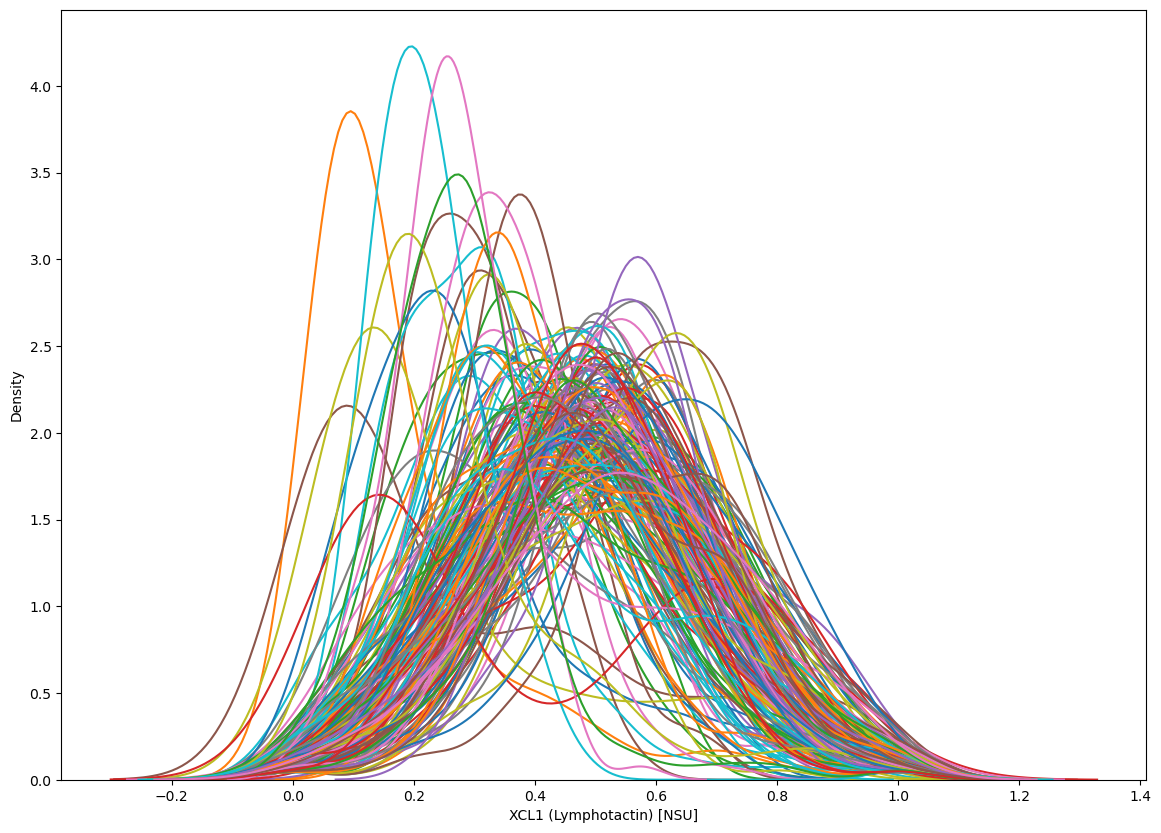

In [13]:
# Set the figure size
plt.figure(figsize=(14, 10))

for i in nELISA_plate_430420.filter(like="NSU", axis=1).columns:
    sns.displot(nELISA_plate_430420[i], hist=False, label=i)

In [14]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("./test.pdf") as pdf:

    for i in nELISA_plate_430420.filter(like="NSU", axis=1).columns:
        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize": (8, 5)})
        # plot a bar chart
        sns.barplot(
            y=nELISA_plate_430420[i],
            x="inducer1",
            data=nELISA_plate_430420,
            estimator=np.mean,
            errorbar=("ci", 95),
            # ci = 50,
            color="#69b3a2",
        )
        pdf.savefig()
        plt.close()

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("./_test.pdf") as pdf:

    for i in nELISA_plate_430420.filter(like="NSU", axis=1).columns:
        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize": (8, 5)})
        # plot a bar chart
        sns.barplot(
            y=nELISA_plate_430420[i],
            x="Function",
            data=nELISA_plate_430420,
            estimator=np.mean,
            errorbar=("ci", 95),
            # ci = 50,
            color="#69b3a2",
        )
        pdf.savefig()
        plt.close()